In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Fluorescence

In [2]:
fluo = pd.read_csv('./fluo_data/ctr/06_Osm_iGCaMP_H03_ContHM_06261700006.csv')['Mean'].values

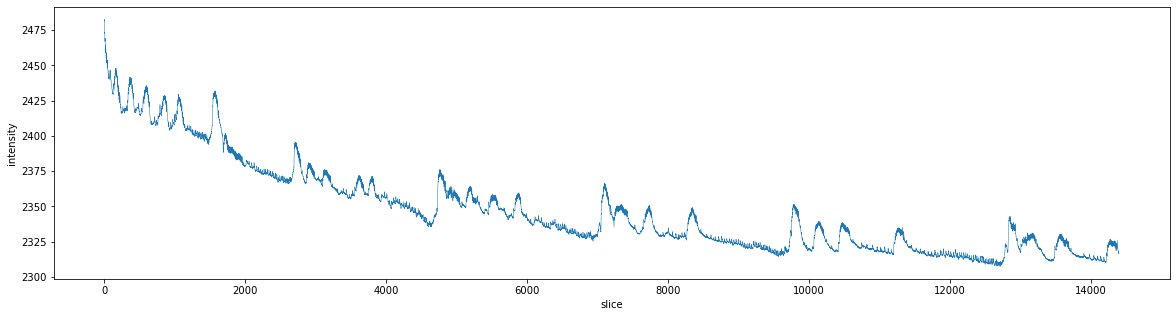

In [3]:
plt.figure(figsize=(20,5))
plt.plot(fluo, lw=.5)
# plt.xlim(6000, 10000)
# plt.ylim(0, 3000)
plt.xlabel('slice')
plt.ylabel('intensity')
plt.show()

In [36]:
# how to get bkg?

## dF/F

In [12]:
def calc_diff(f, wsz):
    dff = np.zeros(len(f))
    for i in range(len(dff)):
        baseline = np.mean(f[max(0, i - wsz) : i+1])
        dff[i] = f[i] / baseline
    return dff

In [13]:
dff = calc_diff(fluo, 200)

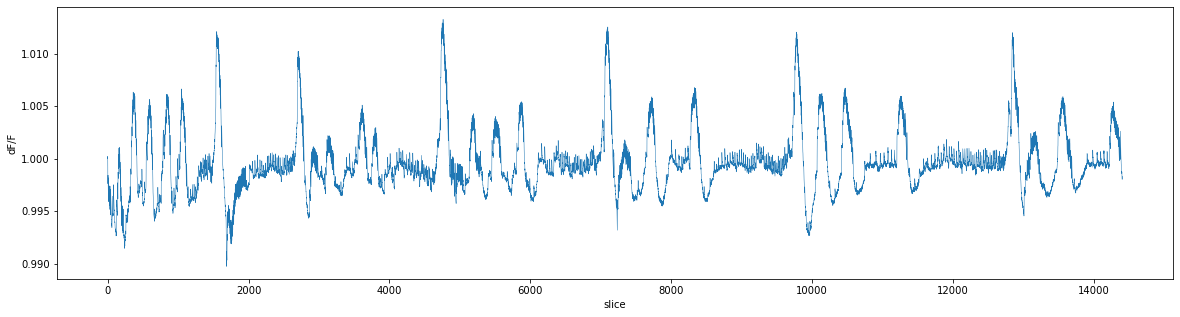

In [21]:
plt.figure(figsize=(20,5))
plt.plot(dff, lw=.5)
plt.xlabel('slice')
plt.ylabel('dF/F')
plt.show()

## Filter

In [19]:
dff_filt = dff # fir_lowpass_ct?

## First derivative

In [27]:
ddff = np.gradient(dff_filt)

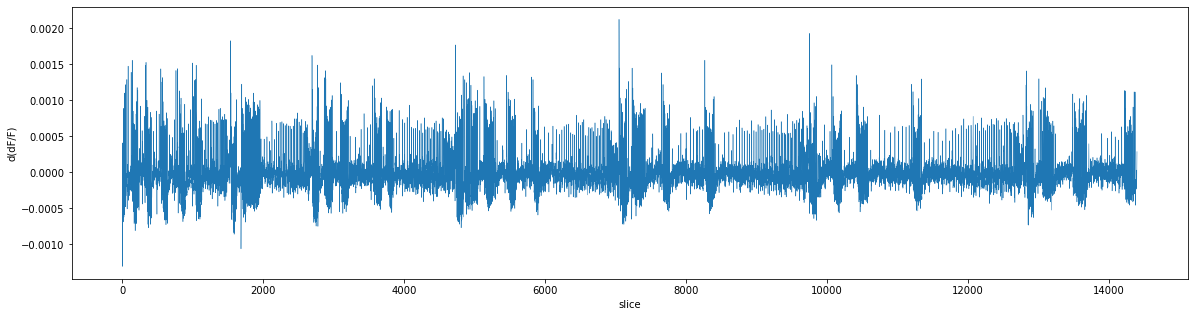

In [35]:
plt.figure(figsize=(20,5))
plt.plot(ddff, lw=.5)
# plt.xlim(6000, 8000)
plt.xlabel('slice')
plt.ylabel('d(dF/F)')
plt.show()

## Define time bins

In [38]:
ysc = [min(dff_filt), max(dff_filt)]

## Select CB time bin